## Machine Learning: FORD Used Car Price Prediction

**Author:
<br> Md. Tariqul Islam
<br> B.Sc. Civil Engg. (KUET)**

In this notebook, we are working on part of a kaggle dataset containing used car information in the US for a total of 7 brands namely Audi, BMW, Skoda, Ford, Volkswagen, Toyota and Hyundai.
(*Dataset Source:* https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw)

<br>We will be developing a machine learning model from scratch based on the used car data for a particular brand, namely FORD, present in this dataset. The objective of the model will be to predict the price for a used car based on available features.

### Import Required Libraries

As mentioned above, we will be building a machine learning model based on our dataset. We might also create some visualizations to better understand what is happening with our data and our model. Hence we will require the following libraries to be imported into our notebook.
- `pandas` for data handling
- `numpy` for numerical operations
- Specific modules from `sklearn` for model related operations as required
- `matplotlib.pyplot` and `seaborn` for data visualization

The following lines of codes will import the required libraries mentioned above.

In [20]:
# Import Libraries for Data handling
import pandas as pd

# Import Libraries for Numerical Operations
import numpy as np

# Import Libraries for Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Import Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Import the Dataset

The next step will be importing our data into the notebook. The filtered data from the original dataset, containing only the information on the FORD brand cars, are saved as a CSV file named `ford.csv`. We can use the `pandas.read_csv()` function to import this data in our notebook as a pandas dataframe object.

In [21]:
# Import data from a CSV file
df = pd.read_csv("ford.csv")

### Explore the Data

It is a good practice to explore the newly imported data and get familiar with every aspects of the dataset before diving into any data analysis operations. Spending a little extra time to understand the data in hand is always helpful in the long run for any data analysis related tasks.

The simplest way of getting a good look at our data is to display the dataframe using the `display()` comamand.

In [22]:
# Display the dataframe data
display(df.head(10))
# Display Dataframe shape
display(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,61.4,1.0


(17964, 8)

We can see the first 10 rows of our dataset along with the shape of the dataframe at bottom stating that the dataset consists of 17964 rows  and 8 columns. That means our dataset for used ford cars contains a total of 17964 observations and 8 features for the observations.

Next we can display the dataframe information to get a summary of the features and their datatypes along with some other informations.

In [23]:
# Display Dataframe Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


We can see that among the 8 features contained in the dataset, 5 are in numerical formats and the other 3 are in string format. Also there are no missing values in any of the features in this dataframe, so no data cleaning operations are required.

### Explain the features

Now we can get familiarized with the features contained in this dataframe to get a better understanding of the dataset. The 8 features contained in the dataframe are:
- `model` : Name of the model of the car in observation
- `year` : The making year of the car in observation
- `price` : The resale price, in US Dollars, of the car in observation. **This will be the target variable for our Machine Learning Model.**
- `transmission` : The transmission system used in the car in observation
- `mileage` : Total number of miles run by the car at the time the study.
- `fuelType` : Type of fuel used by the car
- `mpg` : Number of miles output per galon of fuel
- `engineSize` : The volume of fuel and air that can be pushed through car's cylinders

Now that we have a better understanding of the features present in the dataset and identified our target variable, we can set out to develop our Machine Learning Model.

### Separating the features and target variable

The first step before building a machine learning model is to separate the feature and target variables. As we have seen above, the `price` variable in our dataset is the target variable and all the other seven variables are our feature variables.
<br>We will have to create two different dataframes containing our feature variables and our target variable separately.

For the purpose of building our initial model, we will separate only the numeric variables from our dataset as feature variables and store them in a dataset named `X`, and the `price` variable as our target variable and store it in a dataset named `Y`.

We will first create two lists named `features` and `target` containing only the column names of our feature and target variables and use those lists to extract the desired data columns from our dataframe and store in new ones.

In [24]:
# # Create feature and target lists
# features = df.drop(["price"], axis = 1)
# target = ['price']

# Create feature and target dataframes
X = df.drop(["price"], axis = 1)
y = df[['price']]

# display the dataframe shapes
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (17964, 7)
Shape of y:  (17964, 1)


### Convert Categorical Variables to Numeric Values

As we have seen above, there are three categorical features in our dataset: `model`, `transmission`, and `fuelType`. We cannot use these features directly in our model as they are in string format. We must represent these features in numerical form so that they can be used for training our model.

There are two common ways of transforming categorical/string variables to numeric variables. These two methods are described below along with their pros and cons.

<br>**Label Encoding**: In this method, each of the unique values present in the feature column is associated with a number and the string values in the feature column are replaced with that corresponding number. No new columns are created in this process.
- Pros: No new columns are created. The existing string values in the column are replaced with corresponding numeric values.
- Cons: As each of the unique value is given a numeric value, the numeric values might create a false sense of ordering among the feature values. The variation in numeric values might also wrongly contribute to finding the feature coefficient for that feature.

<br>**One-Hot Encoding**: In this method, each of the unique values in the feature variable is given an individual column with the column values of either `0` or `1`. For any observation in the dataset, the column that represents the actual feature value for that observation is given a value of `1`, and the rest of the columns are given a value of `0`. It might be noted that the *minimum number of columns resulting from a One-Hot Encoding operation is one less than the number of unique values in the feature being encoded*.
- Pros: This method eliminates the false sense of ordering among the feature values as each unique value is given a numeric value of either `0` or `1`.
- Cons: This method introduces new columns in the dataset, which causes an increase in the total number of features to be considered. If the number of unique values in the actual feature is high, the resulting number of columns are high too. This high number of features might have adverse effects in training the model.

Let's have a look at the unique values in our categorical feature columns before making a decision on the method of encoding.

In [25]:
# Display column unique values
print("Unique values in 'model': ", df['model'].unique().size)
print("Unique values in 'transmission': ", df['transmission'].unique().size)
print("Unique values in 'fuelType': ", df['fuelType'].unique().size)

Unique values in 'model':  23
Unique values in 'transmission':  3
Unique values in 'fuelType':  5


As we can see, there are 23 unique values in our `model` feature, which is a way too high number for One-Hot encoding. Although there might arise a ranking issue, label encoding the `model` column is the better choice among the two methods.
As for the other two features, the numbers of unique values are reasonable. So they might be transformed by the method of One-Hot encoding.
But for simplicity, we will use the same encoding method in the whole dataset. So we will be using label encoding for transforming our categorical features.
The following lines of codes will accomplish the desired task.

In [26]:
# Create a LabelEncoder instance
LE = LabelEncoder()

# Apply LabelEncoding to individual features of the dataframe
X['model'] = LE.fit_transform(X['model'])
X['transmission'] = LE.fit_transform(X['transmission'])
X['fuelType'] = LE.fit_transform(X['fuelType'])

# Display the result
display(X.sample(10))

,model,year,transmission,mileage,fuelType,mpg,engineSize
14574,5,2015,1,29469,4,47.9,1.6
13608,13,2016,1,30300,0,64.2,1.5
14915,10,2015,1,54429,0,58.9,1.6
9816,5,2017,1,15354,4,65.7,1.0
10508,2,2019,2,490,4,44.1,1.0
13544,5,1998,1,37000,4,41.5,1.2
10783,2,2018,1,2000,4,54.3,1.0
7284,5,2017,1,20679,4,65.7,1.0
14714,11,2019,1,2296,4,43.5,1.2
3733,1,2015,1,29110,0,68.9,1.5


We can see that our categorical features now contain integer values instead of strings. We can further verify the datatype of the columns by displaying the dataframe info.

In [27]:
# Display Dataframe Info
display(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  int32  
 1   year          17964 non-null  int64  
 2   transmission  17964 non-null  int32  
 3   mileage       17964 non-null  int64  
 4   fuelType      17964 non-null  int32  
 5   mpg           17964 non-null  float64
 6   engineSize    17964 non-null  float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 772.0 KB


None

Now that we have made sure our training data contains only numerical values, we can proceed to the next steps.

### Split the Data into Train Set and Test Set

The next step for building a ML model is to split the available data into training and test set. This basic concept is to use part of the available data for training the model and, after training, to use the rest of the data to test the trained model accuracy.
<br>Usually the train set consists of 80% of the available data, and the test set consists of the rest 20% data. The splitting or sampling is done randomly so as to diversify the observations present in either the test set or the train set.

The splitting is done by using the `train_test_split()` function from `SciKit Learn`. A `random_state` value is provided to the function along with other arguments so that the randomization is fixed and the whole splitting process can be recreated later for comparison purposes. We will be providing `random_state = 47` as the function argument.

In [28]:
# Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

# Display Split Data shapes
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (14371, 7)
y_train shape:  (14371, 1)
X_test shape:  (3593, 7)
y_test shape:  (3593, 1)


#### Perform Linear Regression

Now we will create a linear regression model based on the train set data to predict the price of used FORD cars.

To achieve this goal, we will first need to create an instance of the `LinearRegression()` model in our environment, and then fit our training data in that model.

In [29]:
# Create a model instance
model = LinearRegression()

# Fit data to model
model = model.fit(X_train, y_train)

#### Predict Price from the test set

Now it's time to see if our model is accurate enough to predict the price of used cars. For this purpose, we will use our test features and predict the target variable using our fitted model. The predicted prices will be stored inside a new dataframe.

In [30]:
# Predict from the test set features
y_pred = model.predict(X_test)

#### Evaluate Different Error Metrics

We have already seen a visual representation of the prediction errors in parts of the test data. We can also use different mathematical metrics to measure the level of errors in our model's prediction values.

We will be evaluating the Mean Absolut Error (MAE), Mean Absolute Percentage Error (MAPE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the Coefficient of determination (R^2) values from the actual and predicted prices.

The following lines of codes will accomplish the afforsaid task.

In [31]:
# Calculate MAE
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE)\t\t: ", round(MAE,2))

# Calculate MAPE
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error (MAPE)\t: ", round(MAPE,2))

# Calculate MSE
MSE = mean_squared_error(y_test, y_pred, squared = True)
print("Mean Squared Error (MSE)\t\t: ", round(MSE, 2))

# Calculate RMSE
RMSE = mean_squared_error(y_test, y_pred, squared = False)
print("Root Mean Squared Error (RMSE)\t\t: ", round(RMSE, 2))

# Calculate R2 Score
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2)\t: ", round(r_squared, 2))

Mean Absolute Error (MAE)		:  1746.19
Mean Absolute Percentage Error (MAPE)	:  0.17
Mean Squared Error (MSE)		:  6077167.9
Root Mean Squared Error (RMSE)		:  2465.19
Coefficient of Determination (R^2)	:  0.73


#### Visualize difference between original and predicted prices

We have seen some mathematical measures of the model prediction error. We can also get an understanding of the errors visually by plotting the actual and predicted prices in a line plot.

For visualization purpose, we will first create a new dataframe named `df_compare` containing only the original and predicted prices and rename the columns as `Original_Price` and `Predicted_Price`.

In [32]:
# Create a Blank Dataframe
df_compare = pd.DataFrame()

# Insert dataframe columns
df_compare["x"] = np.arange(0, y_test.shape[0], 1).tolist()
df_compare["Actual_Price"] = y_test['price'].tolist()
df_compare["Predicted_Price"] = y_pred


# Display the result
display(df_compare.head())

,x,Actual_Price,Predicted_Price
0,0,14000,13155.352717
1,1,8500,10547.644088
2,2,8950,9615.301208
3,3,15999,16202.674727
4,4,13495,14213.480252


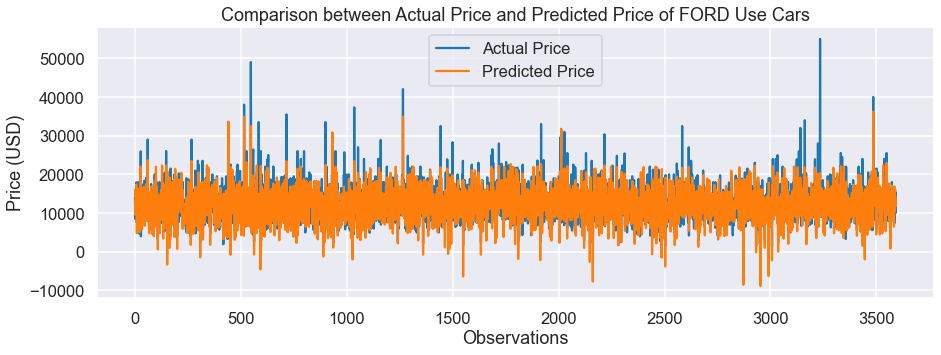

In [33]:
# Create LinePlot Visualization
sns.set_context("talk")
sns.set_style("darkgrid")

plt.figure(figsize = (15,5))
sns.lineplot(x = 'x', y = 'Actual_Price', data = df_compare, label = "Actual Price")
sns.lineplot(x = 'x', y = 'Predicted_Price', data = df_compare, label = "Predicted Price")

plt.title("Comparison between Actual Price and Predicted Price of FORD Use Cars")
plt.ylabel("Price (USD)")
plt.xlabel("Observations")

plt.show()

The plot above shows that there are significant differences between the actual prices and the prices predicted by our model. But it doesn't provide any relationship between the error in prediction and the actual price.

We can display the trend in prediction error by plotting the predicted price against the actual price in a scatter plot as follows.

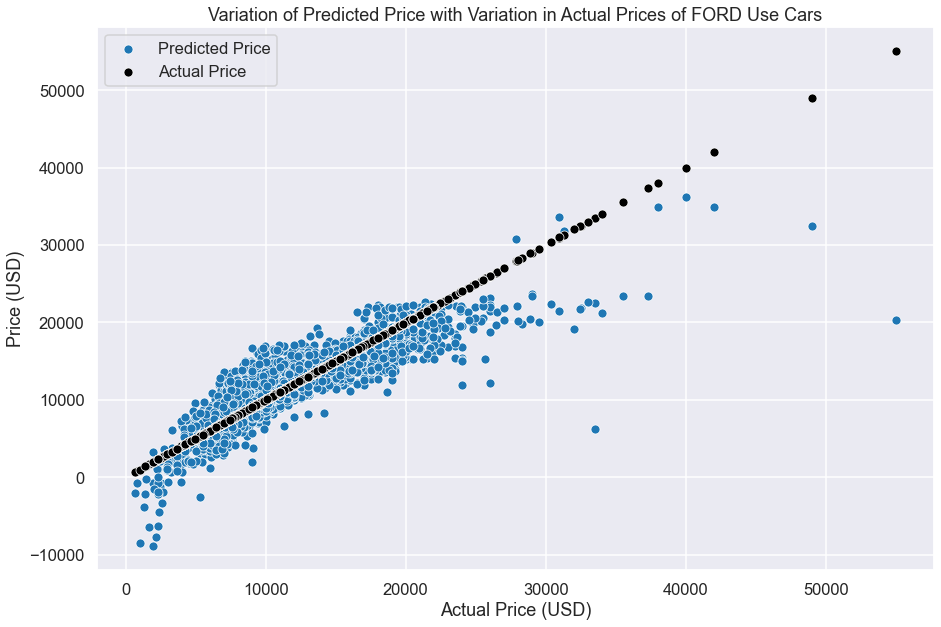

In [34]:
plt.figure(figsize = (15,10))

sns.scatterplot(x = 'Actual_Price', y = 'Predicted_Price', data = df_compare, label = "Predicted Price")
sns.scatterplot(x = 'Actual_Price', y = 'Actual_Price', data = df_compare, color = "black", label = "Actual Price")

plt.title("Variation of Predicted Price with Variation in Actual Prices of FORD Use Cars")
plt.ylabel("Price (USD)")
plt.xlabel("Actual Price (USD)")

plt.show()

The above plot shows that our model prediction are closer to the actual price between the price range of about 5000 to 24000 USD. The prediction below or above the mentioned range seems to be showing large amount of error, with the low range prediction being negative.